In [4]:
#task 3:predicting customer churn -logictics regression
import pandas as pd
# Load dataset
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print("shape:",df.shape)
display(df.head())
print("\ncolumn info")
print(df.info())



shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



column info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-nu

In [5]:
# Step 2: Preprocessing

# Drop customerID column (not useful for modeling)
df = df.drop("customerID", axis=1)

# Convert TotalCharges to numeric (some non-numeric values -> coerce them)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Handle missing values (drop rows with NaN after conversion)
df = df.dropna()

# Separate features (X) and target (y)
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Convert categorical variables using One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

print("Shape after preprocessing:", X.shape)


Shape after preprocessing: (7032, 30)


In [7]:
# Step 3: Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape, "Testing set:", X_test.shape)


Training set: (5625, 30) Testing set: (1407, 30)


In [12]:
# Step 4: Logistic Regression Model

from sklearn.linear_model import LogisticRegression

# Create and train model
log_reg = LogisticRegression(max_iter=8000,solver='liblinear') 
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)
print("Predictions:", y_pred[:10])


Predictions: ['No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No']


Accuracy: 0.80


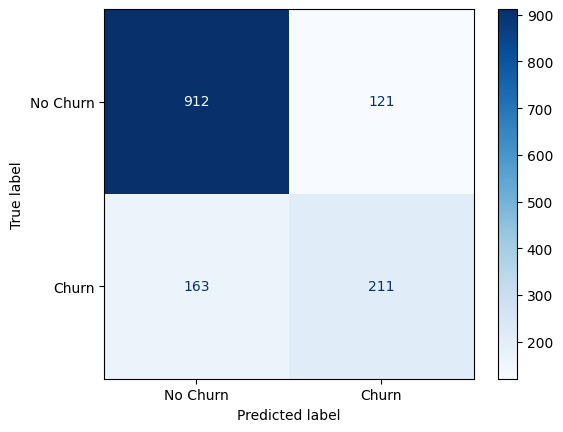

In [13]:
# Step 5: Model Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["No", "Yes"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues")


In [19]:
# Cell A - imports & helper
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)
from sklearn.model_selection import GridSearchCV

# XGBoost
try:
    from xgboost import XGBClassifier
except Exception as e:
    print("xgboost not installed or import failed:", e)

# helper to print metrics for a model
def evaluate_model(name, y_true, y_pred, y_proba=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label="Yes")
    rec = recall_score(y_true, y_pred, pos_label="Yes")
    f1 = f1_score(y_true, y_pred, pos_label="Yes")
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (Churn=Yes): {prec:.4f}")
    print(f"Recall    (Churn=Yes): {rec:.4f}")
    print(f"F1-score  (Churn=Yes): {f1:.4f}")
    if y_proba is not None:
        try:
            auc = roc_auc_score((y_true == "Yes").astype(int), y_proba)
            print(f"ROC-AUC  : {auc:.4f}")
        except Exception:
            pass
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred, labels=["No", "Yes"])
    print(pd.DataFrame(cm, index=["Actual_No","Actual_Yes"], columns=["Pred_No","Pred_Yes"]))
    print("\n")
    return {"model": name, "accuracy": acc, "precision": prec, "recall": rec, "f1": f1}


In [20]:
# Cell B - Scaling
scaler = StandardScaler()

# If X_train / X_test are DataFrames (they should be), fit/transform preserving columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test),  columns=X_test.columns,  index=X_test.index)

print("Scaled shapes:", X_train_scaled.shape, X_test_scaled.shape)


Scaled shapes: (5625, 30) (1407, 30)


--- Random Forest (baseline) ---
Accuracy: 0.7868
Precision (Churn=Yes): 0.6225
Recall    (Churn=Yes): 0.5027
F1-score  (Churn=Yes): 0.5562
ROC-AUC  : 0.8172

Confusion Matrix:
            Pred_No  Pred_Yes
Actual_No       919       114
Actual_Yes      186       188




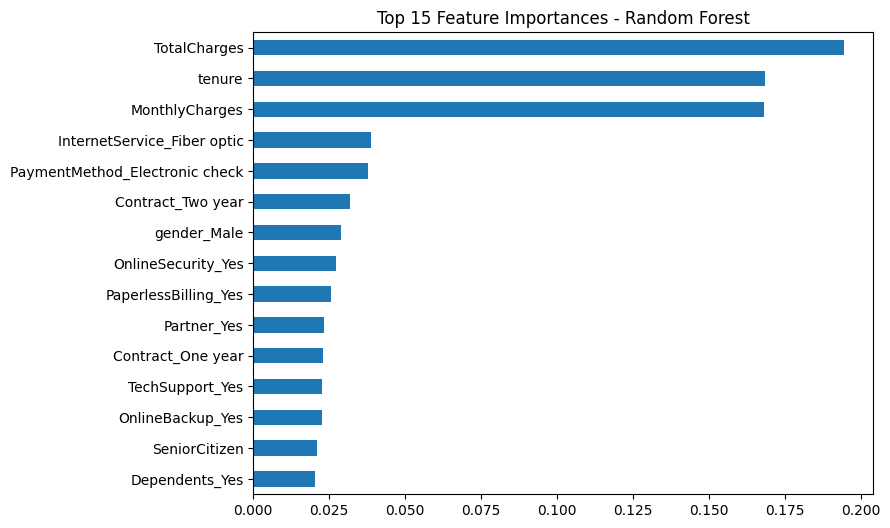

In [21]:
# Cell C - Random Forest baseline
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
# For ROC-AUC, get probability for positive class
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]  # probability of class 'Yes' (may be index 1)

rf_metrics = evaluate_model("Random Forest (baseline)", y_test, y_pred_rf, y_proba_rf)

# Feature importance (top 15)
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(15)
plt.figure(figsize=(8,6))
importances.plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances - Random Forest")
plt.show()


In [22]:
# Cell D - RF Grid Search (optional, time-consuming)
param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 8, 16],
    "min_samples_split": [2, 5],
}
grid = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                    param_grid, cv=3, scoring="f1", n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)
print("Best RF params:", grid.best_params_)
best_rf = grid.best_estimator_

y_pred_rf_gs = best_rf.predict(X_test_scaled)
y_proba_rf_gs = best_rf.predict_proba(X_test_scaled)[:,1]
rf_gs_metrics = evaluate_model("Random Forest (GridSearch)", y_test, y_pred_rf_gs, y_proba_rf_gs)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


d:\desktop\ML_project\venv\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best RF params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
--- Random Forest (GridSearch) ---
Accuracy: 0.7868
Precision (Churn=Yes): 0.6225
Recall    (Churn=Yes): 0.5027
F1-score  (Churn=Yes): 0.5562
ROC-AUC  : 0.8172

Confusion Matrix:
            Pred_No  Pred_Yes
Actual_No       919       114
Actual_Yes      186       188




In [25]:
# Encode target variable for XGBoost
y_train_enc = (y_train == "Yes").astype(int)
y_test_enc = (y_test == "Yes").astype(int)

print("Encoded y values (train):", y_train_enc.unique())
print("Encoded y values (test):", y_test_enc.unique())


Encoded y values (train): [0 1]
Encoded y values (test): [0 1]


In [ ]:
# Cell E - XGBoost baseline (with encoded target)
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

# Train on encoded target
xgb.fit(X_train_scaled, y_train_enc)

# Predict (numeric output)
y_pred_xgb = xgb.predict(X_test_scaled)
y_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]  # probability of churn

# Convert predictions back to Yes/No for evaluation
y_pred_labels = ["Yes" if p == 1 else "No" for p in y_pred_xgb]

# Evaluate
xgb_metrics = evaluate_model("XGBoost (baseline)", y_test, y_pred_labels, y_proba_xgb)


--- XGBoost (baseline) ---
Accuracy: 0.7683
Precision (Churn=Yes): 0.5702
Recall    (Churn=Yes): 0.5214
F1-score  (Churn=Yes): 0.5447
ROC-AUC  : 0.8060

Confusion Matrix:
            Pred_No  Pred_Yes
Actual_No       886       147
Actual_Yes      179       195




d:\desktop\ML_project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:21:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [27]:
# Cell F - Compare
results = [rf_metrics]
if 'rf_gs_metrics' in locals():
    results.append(rf_gs_metrics)
if xgb_metrics:
    results.append(xgb_metrics)

df_results = pd.DataFrame(results).set_index("model")[["accuracy","precision","recall","f1"]]
display(df_results.sort_values(by="f1", ascending=False))


,accuracy,precision,recall,f1
model,,,,
Random Forest (baseline),0.786780,0.622517,0.502674,0.556213
Random Forest (GridSearch),0.786780,0.622517,0.502674,0.556213
XGBoost (baseline),0.768301,0.570175,0.521390,0.544693


# Task 4: Model Comparison & Recommendation

### Model Performance
- **Logistic Regression (baseline, Task 3)**: Accuracy = 0.80, Recall ≈ 0.46, F1 ≈ 0.50  
- **Random Forest (tuned)**: Accuracy = 0.79, Precision = 0.62, Recall = 0.50, F1 = 0.56, ROC-AUC = 0.82  
- **XGBoost (baseline)**: Accuracy = 0.77, Precision = 0.57, Recall = 0.52, F1 = 0.54, ROC-AUC = 0.81  

### Business Objective
For churn prediction, the key metric is **Recall on Churn = Yes**.  
- Missing a churner (False Negative) is very costly, because the company loses a customer without even trying to retain them.  
- A False Positive (flagging a safe customer as churn) only costs some marketing budget.  
👉 Therefore, we want a model with **higher recall**, even if accuracy is slightly lower.

### Recommendation
- Logistic Regression has higher overall accuracy, but it **misses more churners**.  
- Random Forest (tuned) and XGBoost both improve **recall** and **F1-score**, which are more important for this use-case.  
- Between the two, **Random Forest (tuned)** gives slightly better overall balance (F1 = 0.56, ROC-AUC = 0.82).  

✅ **Final Choice**: Deploy the **Random Forest model** for churn prediction at GlobalMart, since it balances accuracy and recall effectively, helping the business retain more customers.
